<a href="https://colab.research.google.com/github/prxrwx/Stat-learning-for-datasci/blob/main/Holt-winters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# uploading the csv file to colab
!pip install wget
!python -m wget -o CM_temp.csv http://www.donlapark.cmustat.com/229351/data/CM_temp.csv

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=3cd01d54ded26b7167bf681173ff2b725d9630e72b03165199dcda4cc14312cc
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget

Saved under CM_temp.csv


In [ ]:
# import module 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from datetime import datetime

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
def parser(dates):
  return datetime.strptime(dates, '%Y-%m-%d')

# parse_dates ชื่อของคอลัมน์ที่จะเปลี่ยนให้เป็น datetime
# index_col ชื่อของคอลัมน์ที่จะให้เป็น index
# date_parser ฟังก์ชันที่เปลี่ยน string ให้เป็น datetime
data = pd.read_csv('CM_temp.csv', parse_dates=['Date'], 
                                        index_col='Date',
                                        date_parser=parser)

data.head()

,MaxTemp
Date,
1998-01-01,30.6
1998-01-02,32.0
1998-01-03,31.6
1998-01-04,32.1
1998-01-05,31.2


ข้อมูล (สมมติว่าชื่อ `data`) ที่ load มาเป็นข้อมูลรายวัน ทำการหาค่าเฉลี่ยรายเดือนด้วยคำสั่ง

In [ ]:
data_monthly = data['MaxTemp'].resample("M").mean()

data_monthly.head()

Date
1998-01-31    31.687097
1998-02-28    33.685714
1998-03-31    37.103226
1998-04-30    37.910000
1998-05-31    35.848387
Freq: M, Name: MaxTemp, dtype: float64

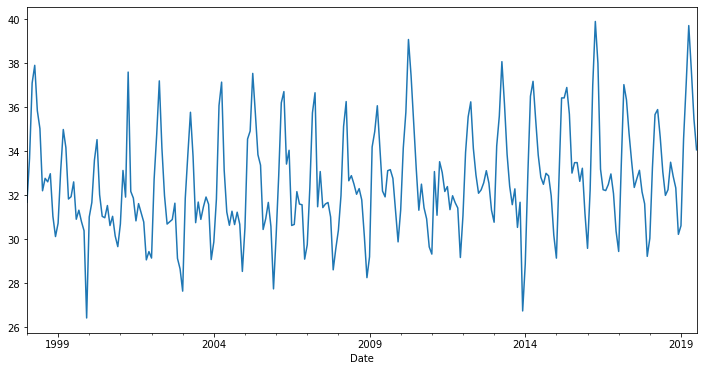

In [ ]:
plt.figure(figsize=(12,6))
data_monthly.plot();

In [ ]:
def rmse(y_true,y_pred):
  # Inputs
  # y_true: actual value, y_pred: predicted values
  # Output: RMSE between y_true and y_pred
  return np.sqrt(np.mean(np.square(y_true-y_pred)))

Train-Test Split

In [ ]:
train = data_monthly[:-24]
test = data_monthly[-24:]

print(test)

Date
2017-08-31    32.764516
2017-09-30    33.140000
2017-10-31    32.158065
2017-11-30    31.616667
2017-12-31    29.229032
2018-01-31    30.048387
2018-02-28    33.253571
2018-03-31    35.674194
2018-04-30    35.900000
2018-05-31    34.648387
2018-06-30    33.066667
2018-07-31    32.000000
2018-08-31    32.258065
2018-09-30    33.506667
2018-10-31    32.864516
2018-11-30    32.336667
2018-12-31    30.229032
2019-01-31    30.622581
2019-02-28    34.564286
2019-03-31    37.051613
2019-04-30    39.716667
2019-05-31    37.680645
2019-06-30    35.466667
2019-07-31    34.070968
Freq: M, Name: MaxTemp, dtype: float64


Holt-Winters

In [ ]:
trend = ['add', 'mul'] #พิจารณาจากกราฟแล้วพบว่าข้อมูลมีแนวโน้ม
damp = [True, False]
seasonal = ['add', 'mul', None]

In [ ]:
for i in trend:
  for j in damp:
    for k in seasonal:
      es = ExponentialSmoothing(train, trend = i, damped = j, seasonal = k, seasonal_periods = 12)
      es_fit = es.fit(optimized = True)
      yhat = es_fit.predict('2017-08-31', '2019-07-31')

      print("Trend = ", i)
      print("Damped = ", j)
      print("Seasonal = ", k)
      print('RMSE:  ' , rmse(test, yhat), '\n')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: invalid value encountered in double_scalars
  'initial_slope': b[0] / phi,


Trend =  add
Damped =  True
Seasonal =  add
RMSE:   nan 



/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:939: RuntimeWarning: invalid value encountered in double_scalars
  'initial_slope': b[0] / phi,
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


Trend =  add
Damped =  True
Seasonal =  mul
RMSE:   nan 

Trend =  add
Damped =  True
Seasonal =  None
RMSE:   2.7985864444432504 

Trend =  add
Damped =  False
Seasonal =  add
RMSE:   1.1242765450405041 

Trend =  add
Damped =  False
Seasonal =  mul
RMSE:   1.1200248391929037 

Trend =  add
Damped =  False
Seasonal =  None
RMSE:   2.6972648601946956 

Trend =  mul
Damped =  True
Seasonal =  add
RMSE:   1.1089486917772098 

Trend =  mul
Damped =  True
Seasonal =  mul
RMSE:   1.1200338467912803 

Trend =  mul
Damped =  True
Seasonal =  None
RMSE:   2.8037652537534434 

Trend =  mul
Damped =  False
Seasonal =  add
RMSE:   1.1895822870232828 

Trend =  mul
Damped =  False
Seasonal =  mul
RMSE:   1.182498365400991 

Trend =  mul
Damped =  False
Seasonal =  None
RMSE:   3.247279467471445 



> จากค่า RMSE พบว่า โมเดลที่กำหนดให้ Trend =  mul, Damped =  True และ Seasonal =  add มีค่า RMSE น้อยที่สุดเท่ากับ 1.1089

In [ ]:
es = ExponentialSmoothing(train, trend = 'mul', damped = True, seasonal = 'add', seasonal_periods = 12)
es_fit = es.fit(optimized = True)
yhat = es_fit.predict('2017-08-31', '2019-07-31')

print('RMSE:' ,rmse(test, yhat))

RMSE: 1.1089486917772098


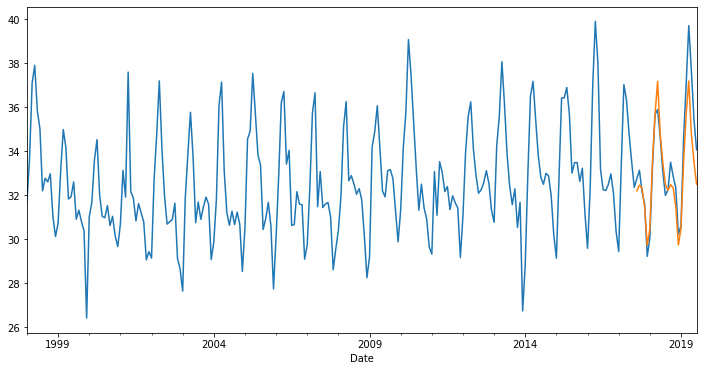

In [ ]:
plt.figure(figsize = (12, 6))
data_monthly.plot()
yhat.plot();